In [1]:
# 1.FINDING COLUMNS WITH NULL VALUES(done)
# 2.REMOVING COLUMNS THAT HAVE >=50% NULL VALUES(done)
# 3.REMOVING THOSE DATA POINTS(ROWS) THAT HAVE TARGET VALUE(LOAN STATUS) AS NA VALUES(done)
# 4.(FINDING RELATIONS BETWEEN COLUMNS->YET TO BE DONE(SDEABORN ISSUE)!(not done)
# 5.CONVERTING TIMESTAMP OBJ TO TIMESTAMP DTYPE(done)
# 6.CONVERTING ANY REMAINING OBJ DTYPE THAT SHOULD HAVE BEEN NUMERIC TO FLOAT(done)
# 7.FINDING CORREL MATRIX(done)
#     I)IN THIS REPLACE NULL VALUES IN COLMNS WITH LABELLED DATA WITH MODE 
#     II)REPLACE NULLL VALUES IN COLUMNS WITH NUMERIC DATA WITH MEAN
# 8.FOR LABELLED COLUMNS CONVERT LABELS TO NUMERIC USING LABEL ENCODER(done)
# 9.PREPARE A MODEL FOR X AND Y WITH Y BEING THE LOAN STATUS(done)
#     AS LOAN STATUS IS A LABELLED COLUMN USE ONE HOT ENCODING(done)
# 10.COMBINE X(df-df[loan status]) and df' WITH OHE.=NEW_x(done)
# 11.Then from ohe make it a 0-1 classification that is all past due=defaulted(viz drop columns)(done)
# 12.SCALING NORMALISATION AND FEATURE EXTRACTION WITH PCA(not done)

In [2]:
# (CAN ALSO BE DONE)
# # 1.We can extract those cols which have more than 50% nulls by a predefined fn instead of hard coding it and then dropping it
# # 2.Hard coding the df_loan to apply mode to the object labelled colmns and mean to others is inevitable
# # 3.After all these we can store the object labelled colmns to appluy categ labelling later on.
# # 4.we can write a fn to only select those colmn thaat have a certain correlation from the correl matrix(pca)

In [3]:

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style="seaborn"
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("prosperLoanData.csv")
df.head(10)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [5]:
df["LoanStatus"].value_counts()

LoanStatus
Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [7]:
df.shape

(113937, 81)

#Data cleaning and Exploration


We will descover null values and we will handle it

In [8]:
df.isnull().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

In [9]:
x = df.isnull().sum()
for i in range(len(x)) :
    print( str(i) + "  : " + str(x[i]) )

0  : 0
1  : 0
2  : 0
3  : 84984
4  : 0
5  : 0
6  : 58848
7  : 25
8  : 0
9  : 0
10  : 29084
11  : 29084
12  : 29084
13  : 29084
14  : 29084
15  : 29084
16  : 0
17  : 5515
18  : 3588
19  : 2255
20  : 7625
21  : 0
22  : 0
23  : 100596
24  : 0
25  : 591
26  : 591
27  : 697
28  : 7604
29  : 7604
30  : 697
31  : 0
32  : 0
33  : 697
34  : 1159
35  : 697
36  : 7622
37  : 990
38  : 697
39  : 7604
40  : 7604
41  : 7604
42  : 7544
43  : 7544
44  : 7544
45  : 7544
46  : 8554
47  : 0
48  : 0
49  : 0
50  : 0
51  : 91852
52  : 91852
53  : 91852
54  : 91852
55  : 91852
56  : 91852
57  : 91852
58  : 95009
59  : 0
60  : 96985
61  : 0
62  : 0
63  : 0
64  : 0
65  : 0
66  : 0
67  : 0
68  : 0
69  : 0
70  : 0
71  : 0
72  : 0
73  : 0
74  : 0
75  : 0
76  : 0
77  : 0
78  : 0
79  : 0
80  : 0


In [10]:
#Calculates the percentage of entries in the column which are nulls
def null_values() :  
    lst = df.isnull().sum()
    for i in range(len(lst)) :
        if lst[i] != 0 :
            x= lst[i]
            col = df.columns[i]
            y= (x/df.shape[0])*100
            print("col num : " +str(i) + " /  " + col + " / " + str(x) + " nulls /"+ str(round(y,2)) +" %")
null_values()     

col num : 3 /  CreditGrade / 84984 nulls /74.59 %
col num : 6 /  ClosedDate / 58848 nulls /51.65 %
col num : 7 /  BorrowerAPR / 25 nulls /0.02 %
col num : 10 /  EstimatedEffectiveYield / 29084 nulls /25.53 %
col num : 11 /  EstimatedLoss / 29084 nulls /25.53 %
col num : 12 /  EstimatedReturn / 29084 nulls /25.53 %
col num : 13 /  ProsperRating (numeric) / 29084 nulls /25.53 %
col num : 14 /  ProsperRating (Alpha) / 29084 nulls /25.53 %
col num : 15 /  ProsperScore / 29084 nulls /25.53 %
col num : 17 /  BorrowerState / 5515 nulls /4.84 %
col num : 18 /  Occupation / 3588 nulls /3.15 %
col num : 19 /  EmploymentStatus / 2255 nulls /1.98 %
col num : 20 /  EmploymentStatusDuration / 7625 nulls /6.69 %
col num : 23 /  GroupKey / 100596 nulls /88.29 %
col num : 25 /  CreditScoreRangeLower / 591 nulls /0.52 %
col num : 26 /  CreditScoreRangeUpper / 591 nulls /0.52 %
col num : 27 /  FirstRecordedCreditLine / 697 nulls /0.61 %
col num : 28 /  CurrentCreditLines / 7604 nulls /6.67 %
col num : 29

##We will kill those columns which have more than 50% null values##

In [11]:
df.drop(columns=["CreditGrade","TotalProsperLoans","TotalProsperPaymentsBilled",
                 "ProsperPaymentsLessThanOneMonthLate","ProsperPaymentsOneMonthPlusLate","ProsperPrincipalBorrowed",
                "ProsperPrincipalOutstanding","ScorexChangeAtTimeOfListing","LoanFirstDefaultedCycleNumber","OnTimeProsperPayments",
                "ClosedDate"],inplace= True )

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 70 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingKey                          113937 non-null  object 
 1   ListingNumber                       113937 non-null  int64  
 2   ListingCreationDate                 113937 non-null  object 
 3   Term                                113937 non-null  int64  
 4   LoanStatus                          113937 non-null  object 
 5   BorrowerAPR                         113912 non-null  float64
 6   BorrowerRate                        113937 non-null  float64
 7   LenderYield                         113937 non-null  float64
 8   EstimatedEffectiveYield             84853 non-null   float64
 9   EstimatedLoss                       84853 non-null   float64
 10  EstimatedReturn                     84853 non-null   float64
 11  ProsperRating (numeric)   

In [13]:
null_values()     

col num : 5 /  BorrowerAPR / 25 nulls /0.02 %
col num : 8 /  EstimatedEffectiveYield / 29084 nulls /25.53 %
col num : 9 /  EstimatedLoss / 29084 nulls /25.53 %
col num : 10 /  EstimatedReturn / 29084 nulls /25.53 %
col num : 11 /  ProsperRating (numeric) / 29084 nulls /25.53 %
col num : 12 /  ProsperRating (Alpha) / 29084 nulls /25.53 %
col num : 13 /  ProsperScore / 29084 nulls /25.53 %
col num : 15 /  BorrowerState / 5515 nulls /4.84 %
col num : 16 /  Occupation / 3588 nulls /3.15 %
col num : 17 /  EmploymentStatus / 2255 nulls /1.98 %
col num : 18 /  EmploymentStatusDuration / 7625 nulls /6.69 %
col num : 21 /  GroupKey / 100596 nulls /88.29 %
col num : 23 /  CreditScoreRangeLower / 591 nulls /0.52 %
col num : 24 /  CreditScoreRangeUpper / 591 nulls /0.52 %
col num : 25 /  FirstRecordedCreditLine / 697 nulls /0.61 %
col num : 26 /  CurrentCreditLines / 7604 nulls /6.67 %
col num : 27 /  OpenCreditLines / 7604 nulls /6.67 %
col num : 28 /  TotalCreditLinespast7years / 697 nulls /0.61

In [14]:
#WE REMOVED THOSE ROWS FOR WHICH THE TARGET VALUES ARE NULLS

In [15]:
df.dropna(subset=["EstimatedEffectiveYield","EstimatedLoss","EstimatedReturn","ProsperRating (numeric)",
"ProsperRating (Alpha)","ProsperScore"],inplace = True)

In [16]:
null_values()   

col num : 16 /  Occupation / 1333 nulls /1.57 %
col num : 18 /  EmploymentStatusDuration / 19 nulls /0.02 %
col num : 21 /  GroupKey / 82827 nulls /97.61 %
col num : 44 /  DebtToIncomeRatio / 7296 nulls /8.6 %


In [17]:
#WE NOW LOOK AT THOSE INPUT COLUMNS WHICH ARE OBVIOUS TO BE DECISIVE

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84853 entries, 1 to 113936
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingKey                          84853 non-null  object 
 1   ListingNumber                       84853 non-null  int64  
 2   ListingCreationDate                 84853 non-null  object 
 3   Term                                84853 non-null  int64  
 4   LoanStatus                          84853 non-null  object 
 5   BorrowerAPR                         84853 non-null  float64
 6   BorrowerRate                        84853 non-null  float64
 7   LenderYield                         84853 non-null  float64
 8   EstimatedEffectiveYield             84853 non-null  float64
 9   EstimatedLoss                       84853 non-null  float64
 10  EstimatedReturn                     84853 non-null  float64
 11  ProsperRating (numeric)             84853 non

In [19]:
df["DebtToIncomeRatio"].describe()

count    77557.000000
mean         0.258752
std          0.318326
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

In [20]:
df["DebtToIncomeRatio"].value_counts()

DebtToIncomeRatio
0.18    3213
0.22    2999
0.17    2749
0.14    2703
0.21    2578
        ... 
1.54       1
3.81       1
4.54       1
1.93       1
2.53       1
Name: count, Length: 259, dtype: int64

In [21]:
df["DebtToIncomeRatio"].fillna(df["DebtToIncomeRatio"].mean,inplace = True)

In [22]:
df.isna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 84853 entries, 1 to 113936
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   ListingKey                          84853 non-null  bool 
 1   ListingNumber                       84853 non-null  bool 
 2   ListingCreationDate                 84853 non-null  bool 
 3   Term                                84853 non-null  bool 
 4   LoanStatus                          84853 non-null  bool 
 5   BorrowerAPR                         84853 non-null  bool 
 6   BorrowerRate                        84853 non-null  bool 
 7   LenderYield                         84853 non-null  bool 
 8   EstimatedEffectiveYield             84853 non-null  bool 
 9   EstimatedLoss                       84853 non-null  bool 
 10  EstimatedReturn                     84853 non-null  bool 
 11  ProsperRating (numeric)             84853 non-null  bool 
 12  ProsperR

In [23]:
# Date features :1- ListingCreationDate , 2- ClosedDate 3- DateCreditPulled 4- FirstRecordedCreditLine , 5- LoanOriginationDate

In [24]:
#HANDLE THE DATA FEATURES

In [25]:
df[["ListingCreationDate","FirstRecordedCreditLine","LoanOriginationDate"]].head()

,ListingCreationDate,FirstRecordedCreditLine,LoanOriginationDate
1,2014-02-27 08:28:07.900000000,1996-03-18 00:00:00,2014-03-03 00:00:00
3,2012-10-22 11:02:35.010000000,1983-02-28 00:00:00,2012-11-01 00:00:00
4,2013-09-14 18:38:39.097000000,2004-02-20 00:00:00,2013-09-20 00:00:00
5,2013-12-14 08:26:37.093000000,1973-03-01 00:00:00,2013-12-24 00:00:00
6,2013-04-12 09:52:56.147000000,2000-09-29 00:00:00,2013-04-18 00:00:00


In [26]:
df["ListingCreationDate"] = df["ListingCreationDate"].str.extract(r"^(\w+)")
df["FirstRecordedCreditLine"] = df["FirstRecordedCreditLine"].str.extract(r"^(\w+)")
df["LoanOriginationDate"] = df["LoanOriginationDate"].str.extract(r"^(\w+)")

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84853 entries, 1 to 113936
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingKey                          84853 non-null  object 
 1   ListingNumber                       84853 non-null  int64  
 2   ListingCreationDate                 84853 non-null  object 
 3   Term                                84853 non-null  int64  
 4   LoanStatus                          84853 non-null  object 
 5   BorrowerAPR                         84853 non-null  float64
 6   BorrowerRate                        84853 non-null  float64
 7   LenderYield                         84853 non-null  float64
 8   EstimatedEffectiveYield             84853 non-null  float64
 9   EstimatedLoss                       84853 non-null  float64
 10  EstimatedReturn                     84853 non-null  float64
 11  ProsperRating (numeric)             84853 non

In [28]:

# Exploratory Data Analysis

In [29]:
#Q1. Check the Multivariate Relationship between BorrowerRate and BorrowerAPR.

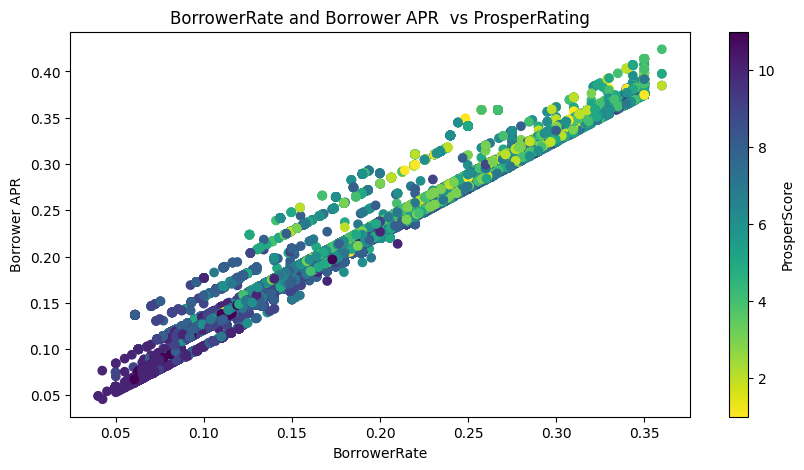

In [30]:
plt.figure(figsize = [10, 5])
plt.scatter(data=df,x='BorrowerRate',y = 'BorrowerAPR',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.xlabel('BorrowerRate')
plt.ylabel('Borrower APR')
plt.title('BorrowerRate and Borrower APR  vs ProsperRating');


In [31]:
# This chart confirms the relations between BorrowerAPR and BorrowerRate, they have strong positive relationship
####### In addition, it shows that most of loans with lower BorrowerAPR & BorrowerRate have higher ProsperScore and visa-versa

In [32]:
#Q1 : Loan Status 

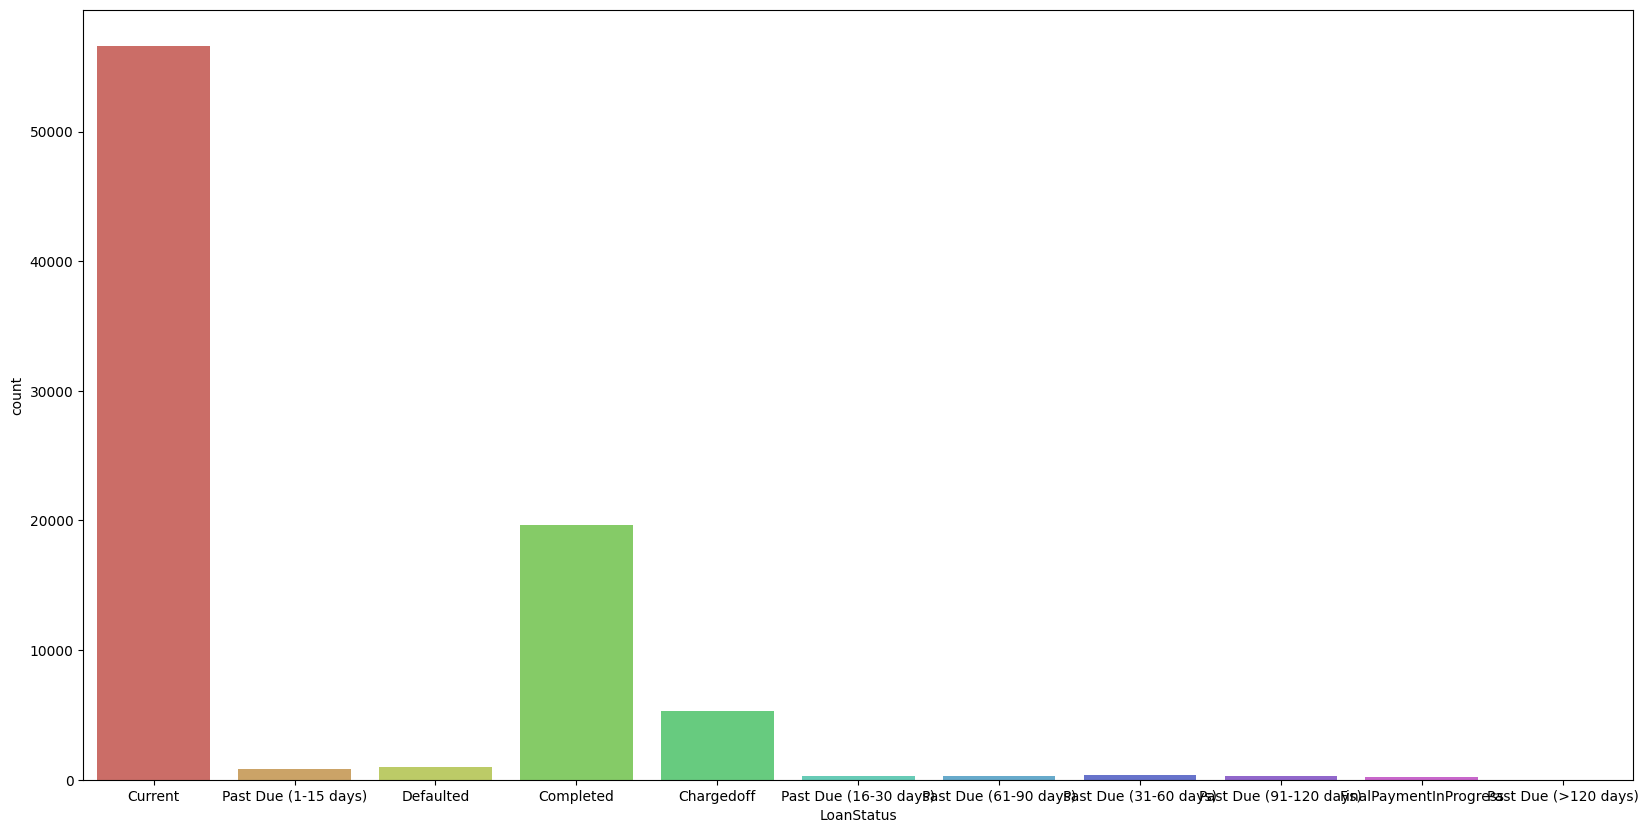

In [33]:

fig, ax = plt.subplots(figsize=(20,10))
#sns.countplot(df["LoanStatus"], palette="hls");
sns.countplot(x="LoanStatus", data=df, palette="hls");

In [34]:

#It appears that most loans are still current at the end of this data collection & Some more than the rest are gone

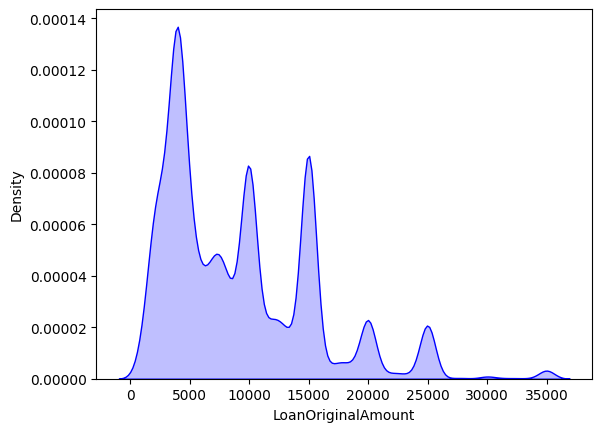

In [35]:
fig = sns.kdeplot(df['LoanOriginalAmount'], shade=True, color="b")

In [36]:
#The largest amount of loans in the borrowed amount goes to the average of 5,000, 10,000, and 15,000 

In [37]:
# we see that Lender Yield is nomarlly distributed with most of the values between 0.1 and 0.2 
#  and we notice an increase at 0.3

In [38]:

# fig, ax = plt.subplots(figsize=(21,10))
# sns.countplot(df["Term"], palette="hls");

In [39]:
#Most loans fall within the three-year range, followed by the five-year range

In [40]:
# plt.style.use("seaborn")
# fig, ax = plt.subplots(figsize=(20,10))
# sns.countplot(df["PublicRecordsLast12Months"], palette="hls");

In [41]:
###NOW WE WILL GO FOR CORREL MATRIX AND THEN PCA AND THEN 

In [42]:

# 1.We can extract those cols which have more than 50% nulls by a predefined fn instead of hard coding it and then dropping it
# 2.Hard coding the df_loan to apply mode to the object labelled colmns and mean to others is inevitable
# 3.After all these we can store the object labelled colmns to appluy categ labelling later on.
# 4.we can write a fn to only select those colmn thaat have a certain correlation from the correl matrix(pca)

In [43]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 84853 entries, 1 to 113936
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingKey                          84853 non-null  object 
 1   ListingNumber                       84853 non-null  int64  
 2   ListingCreationDate                 84853 non-null  object 
 3   Term                                84853 non-null  int64  
 4   LoanStatus                          84853 non-null  object 
 5   BorrowerAPR                         84853 non-null  float64
 6   BorrowerRate                        84853 non-null  float64
 7   LenderYield                         84853 non-null  float64
 8   EstimatedEffectiveYield             84853 non-null  float64
 9   EstimatedLoss                       84853 non-null  float64
 10  EstimatedReturn                     84853 non-null  float64
 11  ProsperRating (numeric)             84853 non

In [44]:
df_loan = df.copy()

In [45]:
# All are categorical data so we use mode concept
cols = ['ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','FirstRecordedCreditLine']


for i in cols:
    df_loan[i].fillna(df_loan[i].mode()[0], inplace=True)
    print(i)

ProsperRating (Alpha)
BorrowerState
Occupation
EmploymentStatus
FirstRecordedCreditLine


In [46]:
import pandas as pd

# Assuming df_loan is your DataFrame
# Step 1: Identify non-numeric values
non_numeric_values = df_loan[~df_loan['DebtToIncomeRatio'].apply(pd.to_numeric, errors='coerce').notna()]

# Step 2: Decide how to handle non-numeric values
# For example, you can replace non-numeric values with NaNs
df_loan['DebtToIncomeRatio'] = pd.to_numeric(df_loan['DebtToIncomeRatio'], errors='coerce')

# Now you can convert the column to numeric
df_loan['DebtToIncomeRatio'] = pd.to_numeric(df_loan['DebtToIncomeRatio'])

# Check if conversion was successful
print(df_loan.info())


<class 'pandas.core.frame.DataFrame'>
Index: 84853 entries, 1 to 113936
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingKey                          84853 non-null  object 
 1   ListingNumber                       84853 non-null  int64  
 2   ListingCreationDate                 84853 non-null  object 
 3   Term                                84853 non-null  int64  
 4   LoanStatus                          84853 non-null  object 
 5   BorrowerAPR                         84853 non-null  float64
 6   BorrowerRate                        84853 non-null  float64
 7   LenderYield                         84853 non-null  float64
 8   EstimatedEffectiveYield             84853 non-null  float64
 9   EstimatedLoss                       84853 non-null  float64
 10  EstimatedReturn                     84853 non-null  float64
 11  ProsperRating (numeric)             84853 non

In [47]:
### All are numerical columns so we use mean concept.
df_loan['DebtToIncomeRatio']=df_loan['DebtToIncomeRatio'].astype(float)

cols =['BorrowerAPR','CreditScoreRangeLower','CreditScoreRangeUpper','ProsperScore','EmploymentStatusDuration','CurrentCreditLines','OpenCreditLines','TotalCreditLinespast7years','InquiriesLast6Months','TotalInquiries',
      'CurrentDelinquencies','AmountDelinquent','DelinquenciesLast7Years','PublicRecordsLast10Years','PublicRecordsLast12Months','RevolvingCreditBalance','BankcardUtilization','AvailableBankcardCredit','TotalTrades',
      'TradesNeverDelinquent (percentage)','TradesOpenedLast6Months','DebtToIncomeRatio']


for i in cols:
    df_loan[i].fillna(df_loan[i].mean(), inplace=True)
    print(i)

BorrowerAPR
CreditScoreRangeLower
CreditScoreRangeUpper
ProsperScore
EmploymentStatusDuration
CurrentCreditLines
OpenCreditLines
TotalCreditLinespast7years
InquiriesLast6Months
TotalInquiries
CurrentDelinquencies
AmountDelinquent
DelinquenciesLast7Years
PublicRecordsLast10Years
PublicRecordsLast12Months
RevolvingCreditBalance
BankcardUtilization
AvailableBankcardCredit
TotalTrades
TradesNeverDelinquent (percentage)
TradesOpenedLast6Months
DebtToIncomeRatio


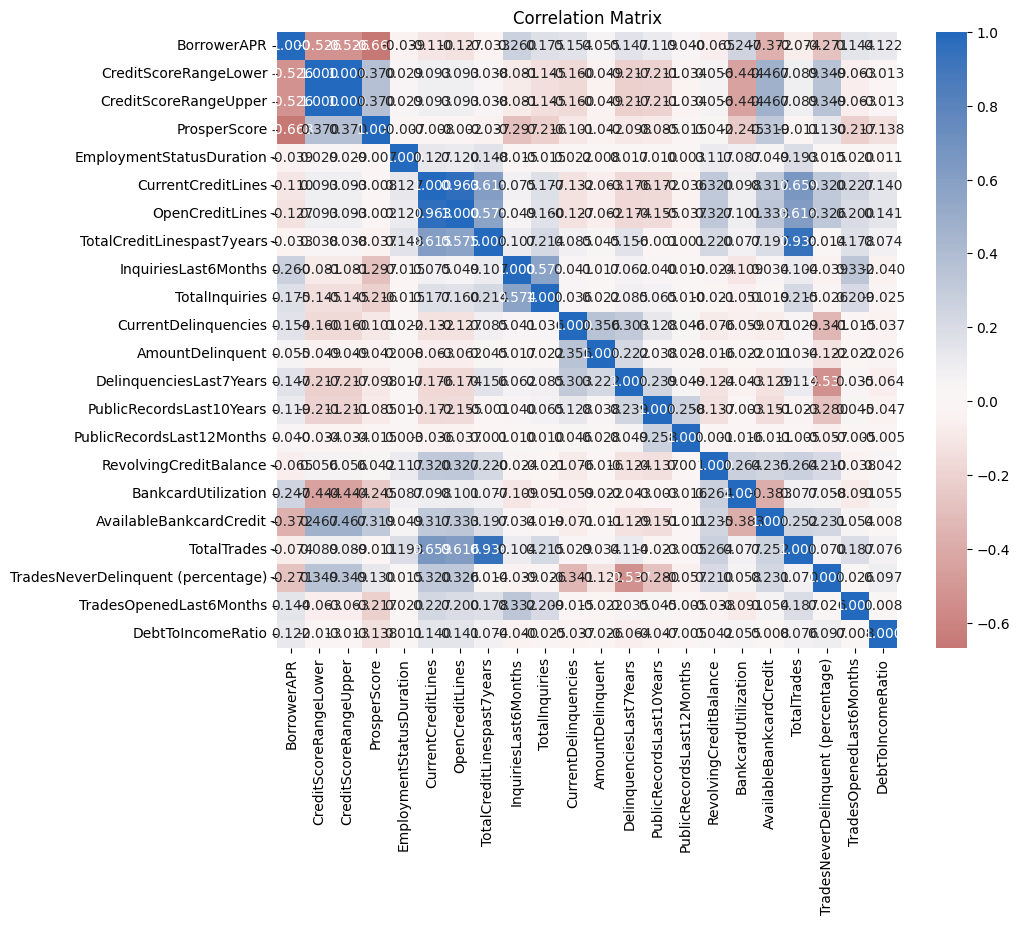

In [48]:
# Correlation matrix for all numeric variables
plt.figure(figsize = [10, 8])
sns.heatmap(df_loan[cols].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix') 
plt.margins(x = 0.5, y= 0.3)
plt.show()

In [49]:
numeric_cols = df.select_dtypes(include='number')
#numeric_cols_without_loanstatus = numeric_cols.drop(columns=['LoanStatus'])


#numeric_cols.drop(columns=['LoanStatus'], inplace=True)


numeric_cols_names = numeric_cols.columns

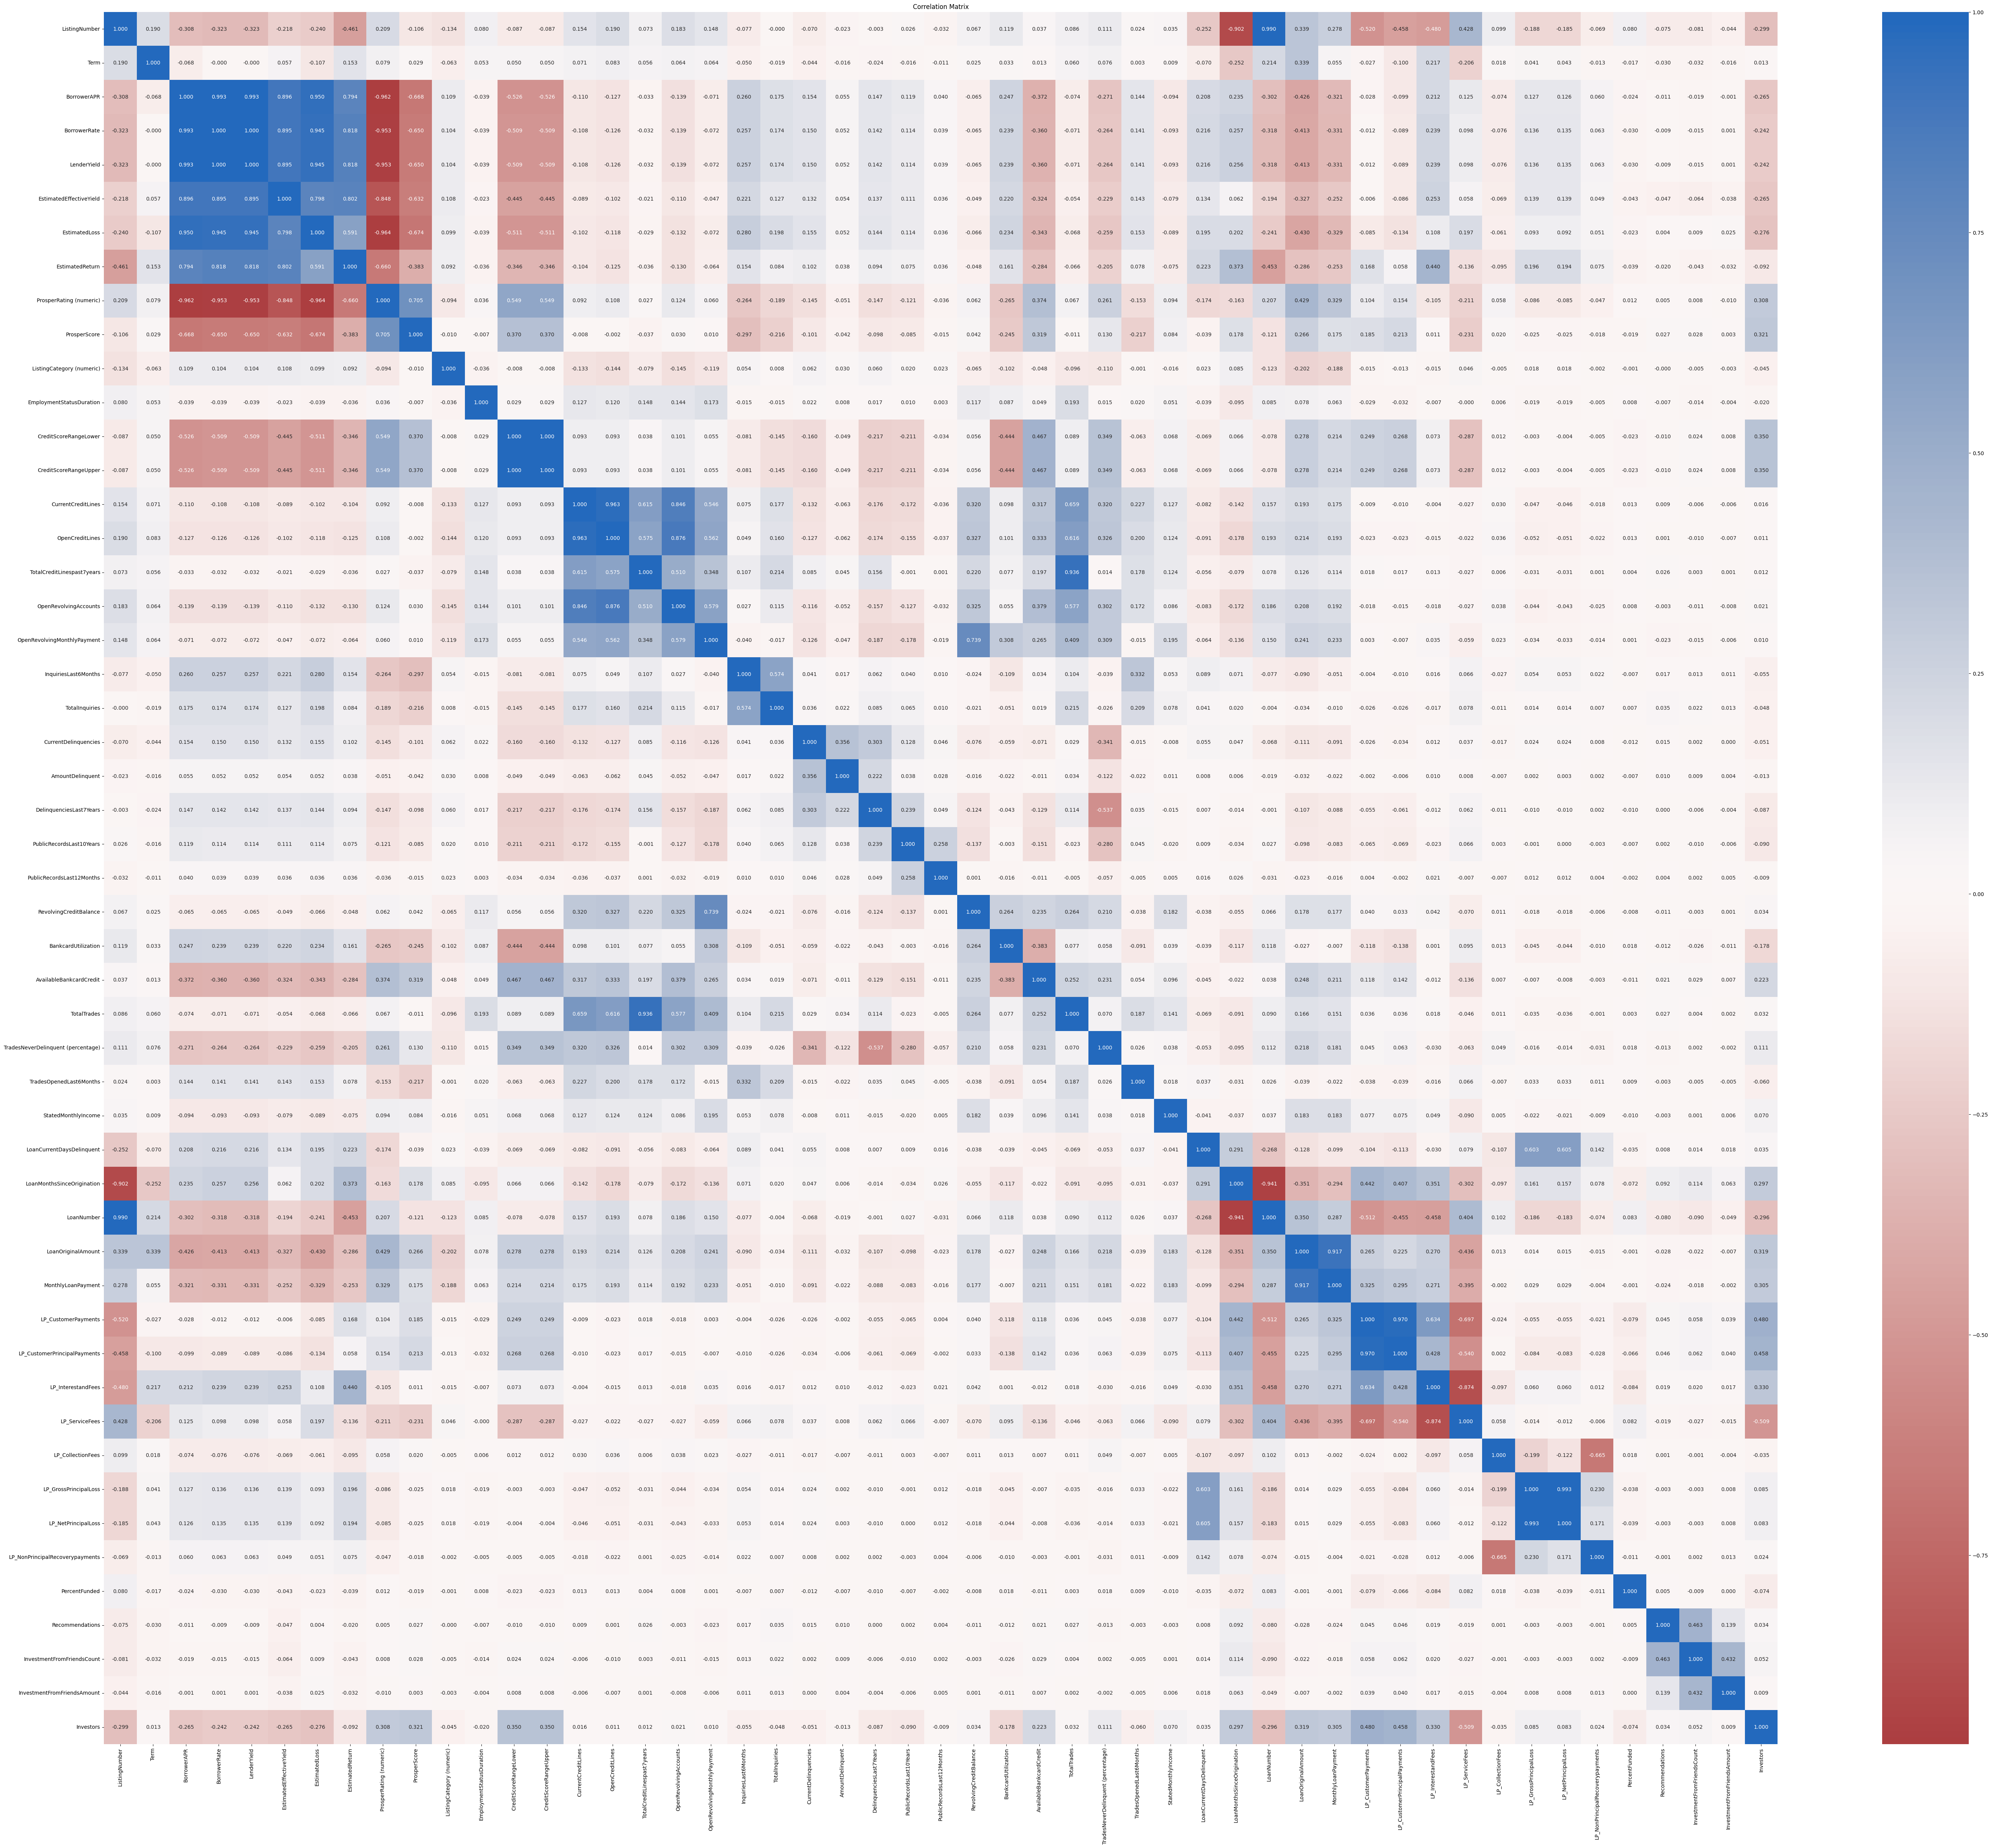

<Figure size 640x480 with 0 Axes>

In [50]:
plt.figure(figsize = [72,60 ])
sns.heatmap(df_loan[numeric_cols_names].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix') 
plt.margins(x = 1.5, y= 1.3)
plt.show()
plt.savefig('correlation_matrix.png', bbox_inches='tight')

In [51]:
# CATEGORICAL LABELLING THOSE COLUMNS WHICH HAVE NON NUMERIC LABELS

In [52]:

#
# A Label Encoder for categorical columns is a preprocessing technique commonly used in machine learning to convert categorical data, represented as text labels, into numerical labels.

# Here's what it does:

# Encoding Categorical Values: It assigns a unique integer to each category or label in the categorical column. Each unique label is mapped to a unique integer starting from 0 up to (number of unique labels - 1).
# Preserving Ordinal Information: If there's ordinality in the categories (meaning, there's a specific order or ranking among the categories), Label Encoding preserves that order by assigning integers in ascending order according to the order of the categories.
# Compatibility with Algorithms: Many machine learning algorithms require numerical input data, and Label Encoding provides a way to convert categorical data into a format that can be provided as input to these algorithms.
# However, there are some important considerations and limitations to be aware of when using Label Encoding:

# No Inherent Meaning in Numbers: Label Encoding simply assigns integers to labels without any inherent meaning. Therefore, the algorithm may incorrectly interpret the encoded values as having some ordinal relationship or mathematical significance, which may not be the case.
# Potential Misinterpretation: Some algorithms may misinterpret the encoded integers as having some sort of mathematical relationship (e.g., assuming that a higher encoded value implies a "higher" category), which can lead to poor performance.
# Not Suitable for Nominal Data: Label Encoding is not suitable for nominal categorical data (categories with no inherent order), as it may introduce unintended relationships between categories.
# Dimensionality Increase: Label Encoding can increase the dimensionality of the dataset, especially if there are many unique categories in a column, which might lead to increased computational complexity.
# Overall, Label Encoding is a simple and efficient way to preprocess categorical data into numerical form, but it should be used with caution, especially when dealing with algorithms that may misinterpret the encoded values. Other encoding techniques like One-Hot Encoding or Binary Encoding may be more suitable in certain scenarios.

In [53]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
1,10273602499503308B223C1,1209647,2014,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
3,0EF5356002482715299901A,658116,2012,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013,60,Current,0.15425,0.1314,0.1214,0.11567,0.0449,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013,36,Current,0.31032,0.2712,0.2612,0.23820,0.1275,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [54]:
cols = ['ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','FirstRecordedCreditLine',
       'IsBorrowerHomeowner','CurrentlyInGroup','DateCreditPulled','IncomeRange','IncomeVerifiable','LoanKey','LoanOriginationQuarter',
       'MemberKey']
df[cols]


,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,FirstRecordedCreditLine,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,IncomeRange,IncomeVerifiable,LoanKey,LoanOriginationQuarter,MemberKey
1,A,CO,Professional,Employed,1996,False,False,2014-02-27 08:28:14,"$50,000-74,999",True,9E3B37071505919926B1D82,Q1 2014,1D13370546739025387B2F4
3,A,GA,Skilled Labor,Employed,1983,True,False,2012-10-22 11:02:32,"$25,000-49,999",True,A0393664465886295619C51,Q4 2012,9ADE356069835475068C6D2
4,D,MN,Executive,Employed,2004,True,False,2013-09-14 18:38:44,"$100,000+",True,A180369302188889200689E,Q3 2013,36CE356043264555721F06C
5,B,NM,Professional,Employed,1973,True,False,2013-12-14 08:26:40,"$100,000+",True,C3D63702273952547E79520,Q4 2013,874A3701157341738DE458F
6,E,KS,Sales - Retail,Employed,2000,False,False,2013-04-12 09:52:53,"$25,000-49,999",True,CE963680102927767790520,Q2 2013,AA4535764146102879D5959
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,C,IL,Food Service Management,Employed,1997,True,False,2013-04-14 05:54:58,"$50,000-74,999",True,9BD7367919051593140DB62,Q2 2013,2EC435768441332602FDC15
113933,A,PA,Professional,Employed,1992,True,False,2011-11-03 20:42:53,"$75,000-99,999",True,62D93634569816897D5A276,Q4 2011,55C4336679182766893E4FC
113934,D,TX,Other,Employed,2002,True,False,2013-12-13 05:49:15,"$25,000-49,999",True,DD1A370200396006300ACA0,Q4 2013,0FE0370029359765342FDB5
113935,C,GA,Food Service,Full-time,1993,True,False,2011-11-14 13:18:24,"$25,000-49,999",True,589536350469116027ED11B,Q4 2011,A33834861822272782621C8


In [55]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','FirstRecordedCreditLine',
       'IsBorrowerHomeowner','CurrentlyInGroup','DateCreditPulled','IncomeRange','IncomeVerifiable','LoanKey','LoanOriginationQuarter',
       'MemberKey']

# Encode labels of multiple columns at once

df_loan[cols] = df_loan[cols].apply(LabelEncoder().fit_transform)

# Print head

df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
1,10273602499503308B223C1,1209647,2014,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
3,0EF5356002482715299901A,658116,2012,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013,60,Current,0.15425,0.1314,0.1214,0.11567,0.0449,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013,36,Current,0.31032,0.2712,0.2612,0.23820,0.1275,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [56]:
df_loan[cols]

,ProsperRating (Alpha),BorrowerState,Occupation,EmploymentStatus,FirstRecordedCreditLine,IsBorrowerHomeowner,CurrentlyInGroup,DateCreditPulled,IncomeRange,IncomeVerifiable,LoanKey,LoanOriginationQuarter,MemberKey
1,0,5,41,0,43,0,0,82799,4,1,51792,4,7786
3,0,10,50,0,30,1,0,35640,3,1,52486,17,41727
4,4,21,19,0,51,1,0,56773,2,1,52936,13,14660
5,2,29,41,0,20,1,0,71298,2,1,64220,18,36428
6,5,15,48,0,47,0,0,43416,3,1,67793,8,45881
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,3,13,23,0,44,1,0,43520,4,1,51020,8,12452
113933,0,35,41,0,39,1,0,16578,5,1,32262,16,23008
113934,4,40,35,0,49,1,0,71126,3,1,72462,18,4209
113935,3,10,22,1,40,1,0,16979,3,1,28884,16,43974


In [57]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84853 entries, 1 to 113936
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingKey                          84853 non-null  object 
 1   ListingNumber                       84853 non-null  int64  
 2   ListingCreationDate                 84853 non-null  object 
 3   Term                                84853 non-null  int64  
 4   LoanStatus                          84853 non-null  object 
 5   BorrowerAPR                         84853 non-null  float64
 6   BorrowerRate                        84853 non-null  float64
 7   LenderYield                         84853 non-null  float64
 8   EstimatedEffectiveYield             84853 non-null  float64
 9   EstimatedLoss                       84853 non-null  float64
 10  EstimatedReturn                     84853 non-null  float64
 11  ProsperRating (numeric)             84853 non

In [58]:
# BUILDING A MODEL 


In [59]:
X = df_loan.drop(columns='LoanStatus', axis=1)
Y = df_loan['LoanStatus']
X

,ListingKey,ListingNumber,ListingCreationDate,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
1,10273602499503308B223C1,1209647,2014,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
3,0EF5356002482715299901A,658116,2012,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013,60,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013,36,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013,36,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011,36,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013,60,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011,60,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [60]:
df_loan['LoanStatus']

1                        Current
3                        Current
4                        Current
5                        Current
6                        Current
                   ...          
113932                   Current
113933    FinalPaymentInProgress
113934                   Current
113935                 Completed
113936                   Current
Name: LoanStatus, Length: 84853, dtype: object

In [61]:
# AS LOAN STATUS IS A CATEGORICAL LABEL WE SHALL USE ONE HOT ENCODING

In [62]:
df_loan1 = pd.get_dummies(df_loan['LoanStatus'])
print(df_loan1.head())

   Chargedoff  Completed  Current  Defaulted  FinalPaymentInProgress  \
1       False      False     True      False                   False   
3       False      False     True      False                   False   
4       False      False     True      False                   False   
5       False      False     True      False                   False   
6       False      False     True      False                   False   

   Past Due (1-15 days)  Past Due (16-30 days)  Past Due (31-60 days)  \
1                 False                  False                  False   
3                 False                  False                  False   
4                 False                  False                  False   
5                 False                  False                  False   
6                 False                  False                  False   

   Past Due (61-90 days)  Past Due (91-120 days)  Past Due (>120 days)  
1                  False                   False       

In [63]:
df['LoanStatus'].value_counts()

LoanStatus
Current                   56576
Completed                 19664
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: count, dtype: int64

In [64]:
# display result
df_loan2 = pd.concat((df_loan1, df_loan), axis=1)
df_loan2 = df_loan2.drop(["LoanStatus"], axis=1)
df_loan2 = df_loan2.drop(["Chargedoff","Current","Defaulted","FinalPaymentInProgress","FinalPaymentInProgress","Past Due (1-15 days)","Past Due (16-30 days)",
                              "Past Due (31-60 days)","Past Due (61-90 days)","Past Due (91-120 days)","Past Due (91-120 days)","Past Due (>120 days)"], axis=1)
data= df_loan2.rename(columns={"Completed": "LoanStatus"})
print(data)

        LoanStatus               ListingKey  ListingNumber  \
1            False  10273602499503308B223C1        1209647   
3            False  0EF5356002482715299901A         658116   
4            False  0F023589499656230C5E3E2         909464   
5            False  0F05359734824199381F61D        1074836   
6            False  0F0A3576754255009D63151         750899   
...            ...                      ...            ...   
113932       False  E6D9357655724827169606C         753087   
113933       False  E6DB353036033497292EE43         537216   
113934       False  E6E13596170052029692BB1        1069178   
113935        True  E6EB3531504622671970D9E         539056   
113936       False  E6ED3600409833199F711B7        1140093   

       ListingCreationDate  Term  BorrowerAPR  BorrowerRate  LenderYield  \
1                     2014    36      0.12016        0.0920       0.0820   
3                     2012    36      0.12528        0.0974       0.0874   
4                     2013 

In [65]:
df_loan1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84853 entries, 1 to 113936
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Chargedoff              84853 non-null  bool 
 1   Completed               84853 non-null  bool 
 2   Current                 84853 non-null  bool 
 3   Defaulted               84853 non-null  bool 
 4   FinalPaymentInProgress  84853 non-null  bool 
 5   Past Due (1-15 days)    84853 non-null  bool 
 6   Past Due (16-30 days)   84853 non-null  bool 
 7   Past Due (31-60 days)   84853 non-null  bool 
 8   Past Due (61-90 days)   84853 non-null  bool 
 9   Past Due (91-120 days)  84853 non-null  bool 
 10  Past Due (>120 days)    84853 non-null  bool 
dtypes: bool(11)
memory usage: 1.5 MB


In [66]:
df_loan2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84853 entries, 1 to 113936
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Completed                           84853 non-null  bool   
 1   ListingKey                          84853 non-null  object 
 2   ListingNumber                       84853 non-null  int64  
 3   ListingCreationDate                 84853 non-null  object 
 4   Term                                84853 non-null  int64  
 5   BorrowerAPR                         84853 non-null  float64
 6   BorrowerRate                        84853 non-null  float64
 7   LenderYield                         84853 non-null  float64
 8   EstimatedEffectiveYield             84853 non-null  float64
 9   EstimatedLoss                       84853 non-null  float64
 10  EstimatedReturn                     84853 non-null  float64
 11  ProsperRating (numeric)             84853 non

In [67]:
data.head()

,LoanStatus,ListingKey,ListingNumber,ListingCreationDate,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
1,False,10273602499503308B223C1,1209647,2014,36,0.12016,0.0920,0.0820,0.07960,0.0249,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
3,False,0EF5356002482715299901A,658116,2012,36,0.12528,0.0974,0.0874,0.08490,0.0249,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,False,0F023589499656230C5E3E2,909464,2013,36,0.24614,0.2085,0.1985,0.18316,0.0925,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,False,0F05359734824199381F61D,1074836,2013,60,0.15425,0.1314,0.1214,0.11567,0.0449,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,False,0F0A3576754255009D63151,750899,2013,36,0.31032,0.2712,0.2612,0.23820,0.1275,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84853 entries, 1 to 113936
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   LoanStatus                          84853 non-null  bool   
 1   ListingKey                          84853 non-null  object 
 2   ListingNumber                       84853 non-null  int64  
 3   ListingCreationDate                 84853 non-null  object 
 4   Term                                84853 non-null  int64  
 5   BorrowerAPR                         84853 non-null  float64
 6   BorrowerRate                        84853 non-null  float64
 7   LenderYield                         84853 non-null  float64
 8   EstimatedEffectiveYield             84853 non-null  float64
 9   EstimatedLoss                       84853 non-null  float64
 10  EstimatedReturn                     84853 non-null  float64
 11  ProsperRating (numeric)             84853 non

In [69]:
data['LoanStatus'].value_counts()

LoanStatus
False    65189
True     19664
Name: count, dtype: int64

In [70]:
data['LoanStatus']=data['LoanStatus'].astype(int)


In [71]:
data['LoanStatus'].value_counts()

LoanStatus
0    65189
1    19664
Name: count, dtype: int64

In [72]:
X = data.drop(columns='LoanStatus', axis=1)
Y = data['LoanStatus']

In [73]:
X

,ListingKey,ListingNumber,ListingCreationDate,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
1,10273602499503308B223C1,1209647,2014,36,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
3,0EF5356002482715299901A,658116,2012,36,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013,36,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013,60,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013,36,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013,36,0.22354,0.1864,0.1764,0.16490,0.0699,0.09500,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011,36,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013,60,0.23984,0.2150,0.2050,0.18828,0.1025,0.08578,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011,60,0.28408,0.2605,0.2505,0.24450,0.0850,0.15950,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [74]:
# Extract object columns
object_cols = X.select_dtypes(include='object').columns

# Drop object columns in place
X.drop(columns=object_cols, inplace=True)

# Print information about the modified DataFrame
print(X.info())


<class 'pandas.core.frame.DataFrame'>
Index: 84853 entries, 1 to 113936
Data columns (total 65 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingNumber                       84853 non-null  int64  
 1   Term                                84853 non-null  int64  
 2   BorrowerAPR                         84853 non-null  float64
 3   BorrowerRate                        84853 non-null  float64
 4   LenderYield                         84853 non-null  float64
 5   EstimatedEffectiveYield             84853 non-null  float64
 6   EstimatedLoss                       84853 non-null  float64
 7   EstimatedReturn                     84853 non-null  float64
 8   ProsperRating (numeric)             84853 non-null  float64
 9   ProsperRating (Alpha)               84853 non-null  int64  
 10  ProsperScore                        84853 non-null  float64
 11  ListingCategory (numeric)           84853 non

In [75]:
Y.value_counts()

LoanStatus
0    65189
1    19664
Name: count, dtype: int64

In [76]:
#Y.info()
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84853 entries, 1 to 113936
Data columns (total 65 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingNumber                       84853 non-null  int64  
 1   Term                                84853 non-null  int64  
 2   BorrowerAPR                         84853 non-null  float64
 3   BorrowerRate                        84853 non-null  float64
 4   LenderYield                         84853 non-null  float64
 5   EstimatedEffectiveYield             84853 non-null  float64
 6   EstimatedLoss                       84853 non-null  float64
 7   EstimatedReturn                     84853 non-null  float64
 8   ProsperRating (numeric)             84853 non-null  float64
 9   ProsperRating (Alpha)               84853 non-null  int64  
 10  ProsperScore                        84853 non-null  float64
 11  ListingCategory (numeric)           84853 non

In [77]:
def train_val_test_split(X, y, val_size=0.1, test_size=0.1, random_state=None):
    """
    Split the dataset into train, validation, and test sets.

    Parameters:
    - X: pandas DataFrame, features
    - y: pandas Series, target variable
    - val_size: float, proportion of the dataset to include in the validation split
    - test_size: float, proportion of the dataset to include in the test split
    - random_state: int or None, random seed for reproducibility

    Returns:
    - X_train: pandas DataFrame, features for training
    - X_val: pandas DataFrame, features for validation
    - X_test: pandas DataFrame, features for testing
    - y_train: pandas Series, target variable for training
    - y_val: pandas Series, target variable for validation
    - y_test: pandas Series, target variable for testing
    """
    # Set random seed if provided
    if random_state is not None:
        np.random.seed(random_state)

    # Shuffle indices
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    # Determine split indices
    split_index_val = int((1 - val_size - test_size) * len(X))
    split_index_test = int((1 - test_size) * len(X))

    # Split data
    X_train, X_val, X_test = (
        X.iloc[indices[:split_index_val]],
        X.iloc[indices[split_index_val:split_index_test]],
        X.iloc[indices[split_index_test:]],
    )
    y_train, y_val, y_test = (
        y.iloc[indices[:split_index_val]],
        y.iloc[indices[split_index_val:split_index_test]],
        y.iloc[indices[split_index_test:]],
    )

    return X_train, X_val, X_test, y_train, y_val, y_test


In [78]:
from sklearn.model_selection import train_test_split

# Split the data into training and temporary sets (80% train and 20% temp)
X_train, X_temp, Y_train, Y_temp = train_test_split(X, Y, test_size=0.2, random_state=100)

# Split the temporary set into validation and testing sets (50% validation and 50% test)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=100)

# Now you have X_train, X_val, X_test, Y_train, Y_val, Y_test


In [79]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8485 entries, 25345 to 94991
Data columns (total 65 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ListingNumber                       8485 non-null   int64  
 1   Term                                8485 non-null   int64  
 2   BorrowerAPR                         8485 non-null   float64
 3   BorrowerRate                        8485 non-null   float64
 4   LenderYield                         8485 non-null   float64
 5   EstimatedEffectiveYield             8485 non-null   float64
 6   EstimatedLoss                       8485 non-null   float64
 7   EstimatedReturn                     8485 non-null   float64
 8   ProsperRating (numeric)             8485 non-null   float64
 9   ProsperRating (Alpha)               8485 non-null   int64  
 10  ProsperScore                        8485 non-null   float64
 11  ListingCategory (numeric)           8485 no

In [80]:
print(
    X.shape,
    X_train.shape,
    X_val.shape,
    X_test.shape,
    Y_train.shape,
    Y_val.shape,
    Y_test.shape,
)

(84853, 65) (67882, 65) (8485, 65) (8486, 65) (67882,) (8485,) (8486,)


In [81]:
#Y_train.value_counts()

In [82]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split



# Apply SMOTE to the training data only
smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [83]:
Y_train.value_counts()

LoanStatus
0    52122
1    52122
Name: count, dtype: int64

In [84]:
def standardize_data(train_data, val_data, test_data):
    """
    Standardize the data based on the mean and standard deviation of the training set.

    Parameters:
    - train_data: numpy array or pandas DataFrame, training data
    - val_data: numpy array or pandas DataFrame, validation data
    - test_data: numpy array or pandas DataFrame, test data

    Returns:
    - standardized_train_data: numpy array or pandas DataFrame, standardized training data
    - standardized_val_data: numpy array or pandas DataFrame, standardized validation data
    - standardized_test_data: numpy array or pandas DataFrame, standardized test data
    """
    # Ensure all data is numeric
    train_data = train_data.astype(float)
    val_data = val_data.astype(float)
    test_data = test_data.astype(float)

    # Compute mean and standard deviation from training data
    mean = np.mean(train_data, axis=0)
    std_dev = np.std(train_data, axis=0)

    # Standardize training data
    standardized_train_data = (train_data - mean) / std_dev

    # Standardize validation data using mean and standard deviation of training data
    standardized_val_data = (val_data - mean) / std_dev

    # Standardize test data using mean and standard deviation of training data
    standardized_test_data = (test_data - mean) / std_dev

    return standardized_train_data, standardized_val_data, standardized_test_data


In [85]:
# WE SHOULD USE THE mu AND sigma VALUES FROM TRAIN X ONLY BUT APPLY THE STDZTN TO BOTH X TRAIN AND XTEST

In [86]:
# # STANDARDISING ONLY THE NUMERICAL COLUMNS

# numeric_cols = data.select_dtypes(include='number')
# numeric_cols_without_loanstatus = numeric_cols.drop(columns=['LoanStatus'])


# numeric_cols.drop(columns=['LoanStatus'], inplace=True)


# numeric_cols_names = numeric_cols.columns




# X_train_standardized=X_train
# X_test_standardized=X_test

# STANDARDISING ONLY THE NUMERICAL COLUMNS

# Assuming `data` is your DataFrame containing both numerical and categorical columns,
# and `X_train` and `X_test` are your training and testing datasets

# Selecting only the numerical columns
numeric_cols = X.select_dtypes(include='number')

# Dropping the 'LoanStatus' column from the numerical columns (if it exists)
# numeric_cols_without_loanstatus = numeric_cols.drop(columns=['LoanStatus'], errors='ignore')

# Dropping the 'LoanStatus' column from the original dataset (if it exists)
# data.drop(columns=['LoanStatus'], inplace=True, errors='ignore')

# Extracting the names of the numerical columns
numeric_cols_names = numeric_cols.columns

# Creating copies of the original training and testing datasets
X_train_standardized = X_train.copy()
X_val_standardized = X_val.copy()
X_test_standardized = X_test.copy()


X_train_standardized, X_val_standardized, X_test_standardized = standardize_data(X_train, X_val, X_test)

# Standardizing the numerical columns in the copied datasets
#X_train_standardized[numeric_cols_names], X_test_standardized[numeric_cols_names] = standardize_data(X_train[numeric_cols_names], X_test[numeric_cols_names])


In [87]:
numeric_cols_names

Index(['ListingNumber', 'Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (numeric)', 'ProsperRating (Alpha)', 'ProsperScore',
       'ListingCategory (numeric)', 'BorrowerState', 'Occupation',
       'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
       'CurrentlyInGroup', 'DateCreditPulled', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'FirstRecordedCreditLine',
       'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies',
       'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6M

In [88]:
# X_train_standardized[numeric_cols_names],X_test_standardized[numeric_cols_names]=standardize_data(X_train[numeric_cols_names],X_test[numeric_cols_names])



In [89]:
Y_test.shape

(8486,)

In [90]:
X_train

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,652637,36,0.357970,0.317700,0.307700,0.279900,0.162500,0.117400,1.000000,6,...,-45.770000,0.0,0.0,0.0,0.0,1.0,0,0,0.0,8
1,435180,36,0.199990,0.166400,0.156400,0.087900,0.065000,0.087900,4.000000,3,...,-18.300000,0.0,0.0,0.0,0.0,1.0,0,0,0.0,75
2,538900,36,0.163920,0.135400,0.125400,0.125000,0.038000,0.087000,6.000000,0,...,-55.220000,0.0,0.0,0.0,0.0,1.0,0,0,0.0,234
3,800765,36,0.257810,0.219900,0.209900,0.193700,0.092500,0.101200,3.000000,4,...,-16.240000,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
4,838503,36,0.295370,0.256600,0.246600,0.225400,0.117500,0.107900,3.000000,4,...,-83.460000,0.0,0.0,0.0,0.0,1.0,0,0,0.0,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104239,435198,36,0.125110,0.104000,0.094000,0.072700,0.021000,0.072700,6.000000,0,...,-89.495761,0.0,0.0,0.0,0.0,1.0,0,0,0.0,171
104240,517090,36,0.347501,0.311161,0.301161,0.285469,0.149407,0.136062,1.514816,5,...,-37.680346,0.0,0.0,0.0,0.0,1.0,0,0,0.0,12
104241,487560,36,0.313251,0.277649,0.267649,0.214037,0.114280,0.143604,3.007986,3,...,-44.399203,0.0,0.0,0.0,0.0,1.0,0,0,0.0,81
104242,591222,36,0.357970,0.317700,0.307700,0.289600,0.165000,0.124600,1.000000,6,...,-12.189161,0.0,0.0,0.0,0.0,1.0,0,0,0.0,12


In [91]:
X_train_standardized

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,-0.201769,-0.413044,1.578655,1.572983,1.573059,1.622252,1.692668,0.601608,-1.819284,1.825715,...,0.147738,0.10203,-0.175257,-0.173414,-0.051399,0.101569,-0.077663,-0.066026,-0.055204,-0.735753
1,-1.152420,-0.413044,-0.384597,-0.448352,-0.448225,-1.135458,-0.373219,-0.333681,-0.005339,0.134630,...,0.642462,0.10203,-0.175257,-0.173414,-0.051399,0.101569,-0.077663,-0.066026,-0.055204,-0.018072
2,-0.698990,-0.413044,-0.832847,-0.862505,-0.862367,-0.602588,-0.945311,-0.362215,1.203957,-1.556456,...,-0.022453,0.10203,-0.175257,-0.173414,-0.051399,0.101569,-0.077663,-0.066026,-0.055204,1.685084
3,0.445798,-0.413044,0.333945,0.266396,0.266506,0.384155,0.209467,0.087992,-0.609987,0.698325,...,0.679561,0.10203,-0.175257,-0.173414,-0.051399,0.101569,-0.077663,-0.066026,-0.055204,-0.810735
4,0.610776,-0.413044,0.800711,0.756700,0.756797,0.839465,0.739182,0.300413,-0.609987,0.698325,...,-0.531045,0.10203,-0.175257,-0.173414,-0.051399,0.101569,-0.077663,-0.066026,-0.055204,0.056910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104239,-1.152341,-0.413044,-1.315147,-1.282002,-1.281854,-1.353776,-1.305517,-0.815592,1.203957,-1.556456,...,-0.639746,0.10203,-0.175257,-0.173414,-0.051399,0.101569,-0.077663,-0.066026,-0.055204,1.010249
104240,-0.794336,-0.413044,1.448549,1.485630,1.485708,1.702244,1.415254,1.193278,-1.508001,1.262020,...,0.293429,0.10203,-0.175257,-0.173414,-0.051399,0.101569,-0.077663,-0.066026,-0.055204,-0.692907
104241,-0.923432,-0.413044,1.022920,1.037905,1.037995,0.676259,0.670963,1.432403,-0.605158,0.134630,...,0.172425,0.10203,-0.175257,-0.173414,-0.051399,0.101569,-0.077663,-0.066026,-0.055204,0.046198
104242,-0.470255,-0.413044,1.578655,1.572983,1.573059,1.761574,1.745640,0.829882,-1.819284,1.825715,...,0.752515,0.10203,-0.175257,-0.173414,-0.051399,0.101569,-0.077663,-0.066026,-0.055204,-0.692907


In [92]:
X_test

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
63011,843215,36,0.30285,0.2639,0.2539,0.23180,0.1225,0.10930,2.0,5,...,-22.14,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
12370,522126,36,0.20200,0.1799,0.1699,0.16690,0.0595,0.10740,5.0,2,...,-239.54,0.0,0.0,0.0,0.0,1.0,0,0,0.0,111
66056,503370,36,0.12511,0.1040,0.0940,0.09380,0.0350,0.05880,6.0,0,...,-59.47,0.0,0.0,0.0,0.0,1.0,0,0,0.0,191
83036,517560,36,0.22362,0.1899,0.1799,0.17570,0.0610,0.11470,4.0,3,...,-49.38,0.0,0.0,0.0,0.0,1.0,0,0,0.0,3
62408,1231002,36,0.08531,0.0716,0.0616,0.06044,0.0149,0.04554,7.0,1,...,-1.10,0.0,0.0,0.0,0.0,1.0,0,0,0.0,165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107279,677412,36,0.21025,0.1734,0.1634,0.15360,0.0624,0.09120,4.0,3,...,-68.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,123
71656,938121,60,0.18555,0.1620,0.1520,0.14311,0.0599,0.08321,5.0,2,...,-49.72,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
58418,928793,36,0.08325,0.0699,0.0599,0.05896,0.0124,0.04656,7.0,1,...,-62.92,0.0,0.0,0.0,0.0,1.0,0,0,0.0,301
76887,871513,36,0.15324,0.1249,0.1149,0.11020,0.0374,0.07280,6.0,0,...,-56.97,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [93]:
X_test_standardized

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
63011,0.631375,-0.413044,0.893667,0.854227,0.854321,0.931388,0.845125,0.344800,-1.214635,1.262020,...,0.573305,0.10203,-0.175257,-0.173414,-0.051399,0.101569,-0.077663,-0.066026,-0.055204,-0.810735
12370,-0.772320,-0.413044,-0.359618,-0.267995,-0.267872,-0.000775,-0.489756,0.284561,0.599309,-0.429066,...,-3.341985,0.10203,-0.175257,-0.173414,-0.051399,0.101569,-0.077663,-0.066026,-0.055204,0.367548
66056,-0.854315,-0.413044,-1.315147,-1.282002,-1.281854,-1.050716,-1.008877,-1.256287,1.203957,-1.556456,...,-0.098994,0.10203,-0.175257,-0.173414,-0.051399,0.101569,-0.077663,-0.066026,-0.055204,1.224482
83036,-0.792281,-0.413044,-0.090942,-0.134397,-0.134278,0.125620,-0.457974,0.516005,-0.005339,0.134630,...,0.082723,0.10203,-0.175257,-0.173414,-0.051399,0.101569,-0.077663,-0.066026,-0.055204,-0.789312
62408,2.326653,-0.413044,-1.809751,-1.714859,-1.714700,-1.529868,-1.434767,-1.676691,1.808605,-0.992761,...,0.952227,0.10203,-0.175257,-0.173414,-0.051399,0.101569,-0.077663,-0.066026,-0.055204,0.945979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107279,-0.093461,-0.413044,-0.257094,-0.354833,-0.354708,-0.191804,-0.428309,-0.229055,-0.005339,0.134630,...,-0.253516,0.10203,-0.175257,-0.173414,-0.051399,0.101569,-0.077663,-0.066026,-0.055204,0.496088
71656,1.046273,1.751704,-0.564046,-0.507135,-0.507006,-0.342472,-0.481281,-0.482376,0.599309,-0.429066,...,0.076600,0.10203,-0.175257,-0.173414,-0.051399,0.101569,-0.077663,-0.066026,-0.055204,-0.810735
58418,1.005494,-0.413044,-1.835351,-1.737570,-1.737411,-1.551125,-1.487739,-1.644353,1.808605,-0.992761,...,-0.161127,0.10203,-0.175257,-0.173414,-0.051399,0.101569,-0.077663,-0.066026,-0.055204,2.402766
76887,0.755085,-0.413044,-0.965570,-1.002783,-1.002641,-0.815161,-0.958024,-0.812421,1.203957,-1.556456,...,-0.053970,0.10203,-0.175257,-0.173414,-0.051399,0.101569,-0.077663,-0.066026,-0.055204,-0.810735


In [94]:
Y_test.shape

(8486,)

In [95]:
X_val

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
25345,619169,60,0.27554,0.2498,0.2398,0.23410,0.0849,0.14920,4.0,3,...,-69.09,0.00,0.00,0.00,0.0,1.0,0,0,0.0,58
87567,517135,36,0.20200,0.1799,0.1699,0.16690,0.0595,0.10740,5.0,2,...,-217.30,0.00,0.00,0.00,0.0,1.0,0,0,0.0,110
37603,516433,36,0.30532,0.2699,0.2599,0.25340,0.1120,0.14140,3.0,4,...,-136.00,0.00,0.00,0.00,0.0,1.0,0,0,0.0,62
91829,761078,36,0.15324,0.1249,0.1149,0.11020,0.0374,0.07280,6.0,0,...,-74.50,0.00,0.00,0.00,0.0,1.0,1,0,0.0,1
42361,982091,36,0.10038,0.0869,0.0769,0.07506,0.0199,0.05516,7.0,1,...,-27.03,0.00,0.00,0.00,0.0,1.0,0,0,0.0,237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52769,585647,36,0.21372,0.1768,0.1668,0.16390,0.0565,0.10740,5.0,2,...,-11.23,-24.47,1689.52,1689.52,0.0,1.0,0,0,0.0,47
113078,1232196,36,0.31975,0.2800,0.2700,0.24550,0.1475,0.09800,2.0,5,...,0.00,0.00,0.00,0.00,0.0,1.0,0,0,0.0,1
95519,532565,36,0.13220,0.1110,0.1010,0.10070,0.0200,0.08070,6.0,0,...,-107.32,0.00,0.00,0.00,0.0,1.0,0,0,0.0,104
98656,599177,60,0.16151,0.1385,0.1285,0.12800,0.0200,0.10800,6.0,0,...,-176.73,0.00,0.00,0.00,0.0,1.0,0,0,0.0,22


In [96]:
print(
    X.shape,
    X_train.shape,
    X_val.shape,
    X_test.shape,
    Y_train.shape,
    Y_val.shape,
    Y_test.shape,
)

(84853, 65) (104244, 65) (8485, 65) (8486, 65) (104244,) (8485,) (8486,)


In [97]:
# APPLYING PCA

In [98]:

def compute_eigenvalue(cov_matrix, num_iterations=1000, tolerance=1e-6):
    # Initialize a random vector
    vec = np.random.rand(cov_matrix.shape[0])
    
    for _ in range(num_iterations):
        # Multiply the covariance matrix by the vector
        new_vec = np.dot(cov_matrix, vec)
        
        # Normalize the resulting vector
        new_vec /= np.linalg.norm(new_vec)
        
        # Compute the change in vector
        delta = np.abs(np.linalg.norm(new_vec) - np.linalg.norm(vec))
        
        # Check for convergence
        if delta < tolerance:
            break
        
        vec = new_vec
    
    # Compute the eigenvalue
    eigenvalue = np.dot(vec, np.dot(cov_matrix, vec))
    
    return eigenvalue, vec
def pca_custom(data, n_components=None):
    """
    Perform Principal Component Analysis (PCA) on the given data.

    Parameters:
    - data: numpy array or pandas DataFrame, input data
    - n_components: int or None, number of principal components to retain
                    If None, all components will be retained.

    Returns:
    - principal_components: numpy array, principal components
    """
    # Center the data
    centered_data = data - np.mean(data, axis=0)

    # Calculate covariance matrix
    covariance_matrix = np.cov(centered_data, rowvar=False)

    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort eigenvalues and corresponding eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    if n_components is None:
        principal_components = sorted_eigenvectors
    else:
        # Select top n_components eigenvectors
        principal_components = sorted_eigenvectors[:, :n_components]
    
    explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)

    return principal_components, explained_variance_ratio




In [99]:
#APPLYING PCA WITH THIS ALGO TAKES O(M*NLOGN) WHERE M=~100,000, N~=70

In [100]:
principal_components, explained_variance_ratio =pca_custom(X_train_standardized,n_components=41)

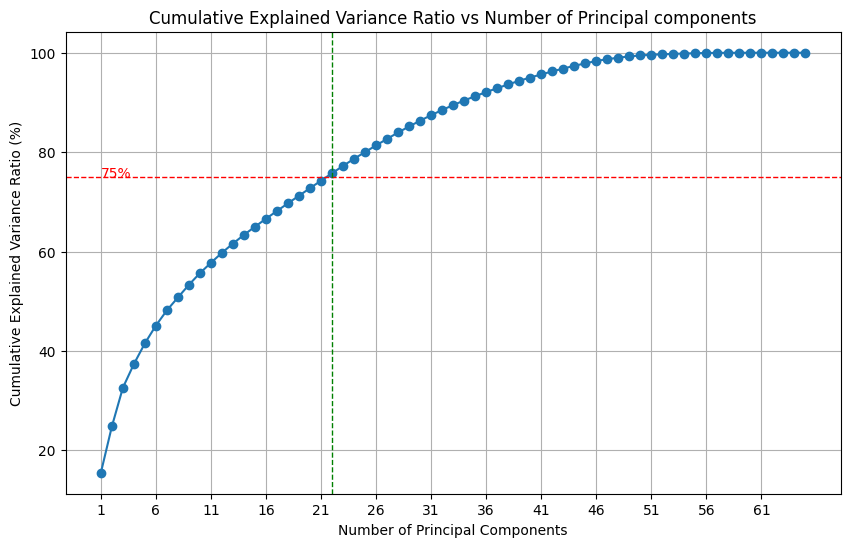

In [101]:
import numpy as np
import matplotlib.pyplot as plt

def plot_cumulative_explained_variance_ratio(explained_variance_ratio):
    """
    Plot cumulative explained variance ratio vs k.

    Parameters:
    - explained_variance_ratio: list or array-like, explained variance ratio for each principal component
    """
    k_values = range(1, len(explained_variance_ratio) + 1)
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio) * 100  # Convert to percentage

    plt.figure(figsize=(10, 6))
    plt.plot(k_values, cumulative_variance_ratio, marker='o', linestyle='-')
    plt.axhline(y=75, color='r', linestyle='--', linewidth=1)  
    plt.text(1, 75, '75%', color='red')
    plt.title('Cumulative Explained Variance Ratio vs Number of Principal components')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance Ratio (%)')
    plt.xticks(range(1, len(explained_variance_ratio) + 1, 5))
    plt.grid(True)
    
    # Find the index where cumulative variance ratio exceeds 95%
    idx_75 = np.argmax(cumulative_variance_ratio >= 75)
    
    # Draw vertical line
    plt.axvline(x=idx_75 + 1, color='g', linestyle='--', linewidth=1)
    #plt.text(idx_95 + 1, 0, f'PC {idx_95 + 1}', color='green', rotation=90, va='bottom')
    plt.savefig('Explained_Ratio_vs_Principal_Components.png')  # Save the figure
    
    plt.show()

# Example usage
# explained_variance_ratio is a list/array containing the explained variance ratio for each principal component
# For example, if you're using PCA, you can get it from pca.explained_variance_ratio_
# Replace explained_variance_ratio with your actual data
# Here I'm just using random data for demonstration purposes
plot_cumulative_explained_variance_ratio(explained_variance_ratio)


In [102]:
# Fit PCA on the training set#

principal_components, explained_variance_ratio = pca_custom(X_train_standardized, n_components=21)

# Apply PCA transformation to both training and test sets
X_train_pca = np.dot(X_train_standardized, principal_components)
X_val_pca = np.dot(X_val_standardized, principal_components)
X_test_pca = np.dot(X_test_standardized, principal_components)

In [103]:
import pandas as pd

# Create DataFrames from transformed arrays
X_train_pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])
X_val_pca_df = pd.DataFrame(X_val_pca, columns=[f'PC{i+1}' for i in range(X_val_pca.shape[1])])
X_test_pca_df = pd.DataFrame(X_test_pca, columns=[f'PC{i+1}' for i in range(X_test_pca.shape[1])])


In [104]:
X_train_pca_df.to_csv("X_train_pca.csv",index=False)
X_val_pca_df.to_csv("X_val.csv",index=False)
X_test_pca_df.to_csv("X_test.csv",index=False)
Y_train.to_csv("Y_train.csv",index=False)
Y_val.to_csv("Y_val.csv",index=False)
Y_test.to_csv("Y_test.csv",index=False)

In [105]:
Y_val.value_counts()

LoanStatus
0    6569
1    1916
Name: count, dtype: int64

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
# Create a logistic regression model
logistic_model = LogisticRegression()

# Fit the model to the training data
logistic_model.fit(X_train_pca_df, Y_train)

# Predict class labels for the test set
y_pred_test = logistic_model.predict(X_test_pca_df)

# Calculate F1 score
f1 = f1_score(Y_test, y_pred_test)

# Calculate AUC score
# Since Logistic Regression doesn't have a decision_function method, we use predict_proba[:, 1]
# to get the probability estimates for the positive class
y_pred_proba_test = logistic_model.predict_proba(X_test_pca_df)[:, 1]
auc = roc_auc_score(Y_test, y_pred_proba_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred_test)

print("Test Set Accuracy:", accuracy)
print("Test Set F1 Score:", f1)
print("Test Set AUC Score:", auc)


Test Set Accuracy: 0.9083195851991516
Test Set F1 Score: 0.8268802848242099
Test Set AUC Score: 0.9701086636779743


In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
# Create a logistic regression model
logistic_model = LogisticRegression()

# Fit the model to the training data
logistic_model.fit(X_train_pca_df, Y_train)

# Predict class labels for the test set
y_pred_test = logistic_model.predict(X_train_pca_df)

# Calculate F1 score
f1 = f1_score(Y_train, y_pred_test)

# Calculate AUC score
# Since Logistic Regression doesn't have a decision_function method, we use predict_proba[:, 1]
# to get the probability estimates for the positive class
y_pred_proba_test = logistic_model.predict_proba(X_train_pca_df)[:, 1]
auc = roc_auc_score(Y_train, y_pred_proba_test)

# Calculate accuracy
accuracy = accuracy_score(Y_train, y_pred_test)

print("Train Set Accuracy:", accuracy)
print("Train Set F1 Score:", f1)
print("Train Set AUC Score:", auc)


Train Set Accuracy: 0.9257223437320133
Train Set F1 Score: 0.9273360298050846
Train Set AUC Score: 0.9763033950531926
